<a href="https://colab.research.google.com/github/usintec/3DBEFUnet/blob/master/3DBEFUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/usintec/3DBEFUnet.git
%cd 3DBEFUnet

# Install dependencies
!pip install -r requirements.txt


Cloning into '3DBEFUnet'...
remote: Enumerating objects: 683, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 683 (delta 54), reused 60 (delta 26), pack-reused 589 (from 1)
Receiving objects: 100% (683/683), 1.18 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (441/441), done.
/content/3DBEFUnet
Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 21.3 MB/s eta 0:0

In [1]:
%cd 3DBEFUnet

/content/3DBEFUnet


In [17]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 274 bytes | 274.00 KiB/s, done.
From https://github.com/usintec/3DBEFUnet
   6b6a97f..0dc85e2  master     -> origin/master
Updating 6b6a97f..0dc85e2
Fast-forward
 train.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [ ]:
!pip install -r requirements.txt --upgrade
import os, sys
os.kill(os.getpid(), 9)   # force restart so numpy reloads correctly


Ignoring numpy: markers 'platform_system == "Windows"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 147.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 148.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-

In [1]:
# =========================
# Setup Kaggle & Download BraTS2020 Dataset
# =========================

# Install required libraries
!pip install -q nibabel pydicom nilearn matplotlib opencv-python kaggle

import os
import zipfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import random
import scipy.ndimage as ndimage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 69.5 MB/s eta 0:00:00


In [2]:
# =========================
# 1. Kaggle API Setup
# =========================
# Upload kaggle.json from your Kaggle account to Colab
from google.colab import files

print("Please upload your kaggle.json (from Kaggle > Account > Create API Token)")
files.upload()

# Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# =========================
# 2. Download BraTS2020 Dataset
# =========================
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation -p /content/

# Unzip dataset
!unzip -q /content/brats20-dataset-training-validation.zip -d /content/brats2020


Please upload your kaggle.json (from Kaggle > Account > Create API Token)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
 99% 4.13G/4.16G [01:00<00:01, 23.9MB/s]
100% 4.16G/4.16G [01:00<00:00, 74.1MB/s]


In [3]:
# Check dataset structure
!ls /content/brats2020

# =========================
# 3. Load & Explore MRI Data
# =========================
# Example: Load one subject
example_path = glob.glob("/content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/*.nii*")[0]
print("Example file:", example_path)

# Load NIfTI image using nibabel
img = nib.load(example_path)
img_data = img.get_fdata()

print("Image shape:", img_data.shape)  # typically (240, 240, 155)


BraTS2020_TrainingData	BraTS2020_ValidationData
Example file: /content/brats2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii
Image shape: (240, 240, 155)


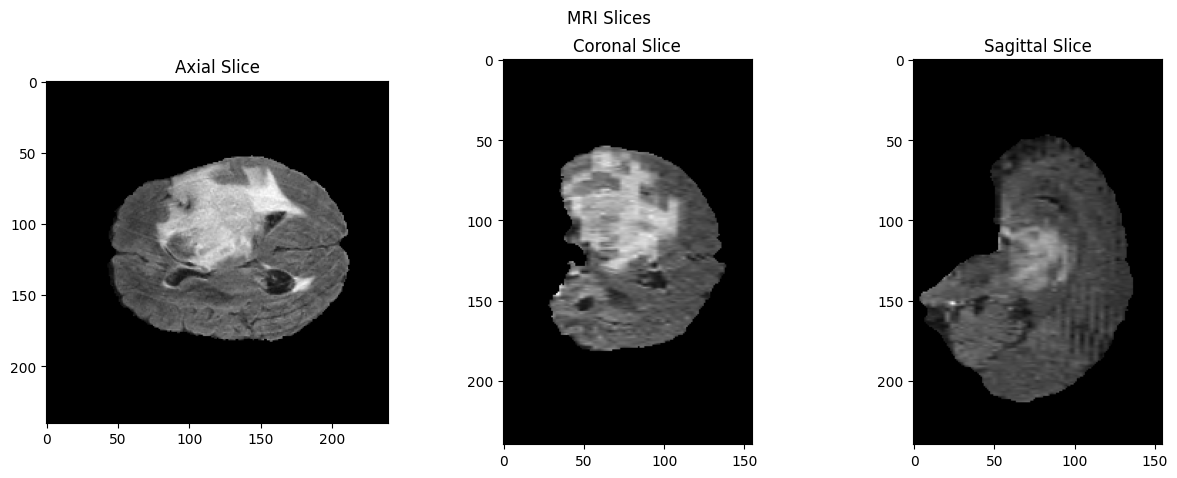

In [ ]:
# =========================
# 4. Visualize MRI slices
# =========================
def plot_slices(img_data, title="MRI Slices"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_data[:, :, img_data.shape[2]//2], cmap="gray")
    axes[0].set_title("Axial Slice")
    axes[1].imshow(img_data[:, img_data.shape[1]//2, :], cmap="gray")
    axes[1].set_title("Coronal Slice")
    axes[2].imshow(img_data[img_data.shape[0]//2, :, :], cmap="gray")
    axes[2].set_title("Sagittal Slice")
    plt.suptitle(title)
    plt.show()

plot_slices(img_data)

In [ ]:
#%cd 3DBEFUnet
!python train.py \
  --output_dir /content/drive/MyDrive/outputs

Streaming output truncated to the last 5000 lines.
 97%|████████████████████████████████ | 72/74 [01:41<00:01,  1.38it/s] idx 72 case BraTS20_Training_311 mean_dice 0.292693 mean_hd95 2.621588

 99%|████████████████████████████████▌| 73/74 [01:42<00:00,  1.51it/s] idx 73 case BraTS20_Training_293 mean_dice 0.120893 mean_hd95 5.076993

100%|█████████████████████████████████| 74/74 [01:43<00:00,  1.39s/it]
Mean class 1 mean_dice 0.225607 mean_hd95 7.296762
Mean class 2 mean_dice 0.304553 mean_hd95 7.721509
Mean class 3 mean_dice 0.000000 mean_hd95 0.000000
Testing performance (best-val model): mean_dice: 0.176720  mean_hd95: 5.006090
No improvement. Patience counter = 1/3
  1%|▏                    | 360/50150 [1:15:56<6387:21:56, 461.83s/it]iter 3291 : total 0.46005 | ce 0.04301 | dice 0.70263 | dlf 0.21265
iter 3292 : total 0.43102 | ce 0.02589 | dice 0.59941 | dlf 0.61020
iter 3293 : total 0.38216 | ce 0.01173 | dice 0.54796 | dlf 0.48688
iter 3294 : total 0.43602 | ce 0.04848 | dice 0